<a href="https://colab.research.google.com/github/yutongxie58/CNN-Image-Classifier/blob/main/CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [59]:
import tensorflow as tf
import os
gpus = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(gpus))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Preprocess Data

### Load Data

In [ ]:
import cv2
import imghdr

In [ ]:
!unzip 'data.zip'

In [11]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/cat/petting_pet_cat-1200x628-facebook-1200x628.jpg
Image not in ext list data/cat/CADE_IMAGES_white-cat-light-green-eyes-meowing.jpg
Image not in ext list data/cat/beige-cat-with-green-eyes-licking-lips-SW.jpg
Image not in ext list data/cat/Cat_November_2010-1a.jpg
Image not in ext list data/cat/media_1acca75e6302d23f8283e3b98c0ec17de6be38518.jpeg
Image not in ext list data/cat/cat-g9rdx9uk2425fip2.jpg
Image not in ext list data/cat/black-cat-back.jpg
Image not in ext list data/cat/Himalayan-chocolate-point.jpg
Image not in ext list data/dog/depositphotos_9578561-stock-photo-dog-on-black-background.jpg
Image not in ext list data/dog/happy-puppy-welsh-corgi-14-260nw-2270841247.jpg
Image not in ext list data/dog/GettyImages-178920540-e1689348859523.webp
Image not in ext list data/dog/dachshund-dog.jpg
Image not in ext list data/dog/beautiful-dog-pictures-1920-x-1200-0kbowtl23b3i5iu7.jpg
Image not in ext list data/dog/photo-cute-golden-retriever-running-260nw-22

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 371 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

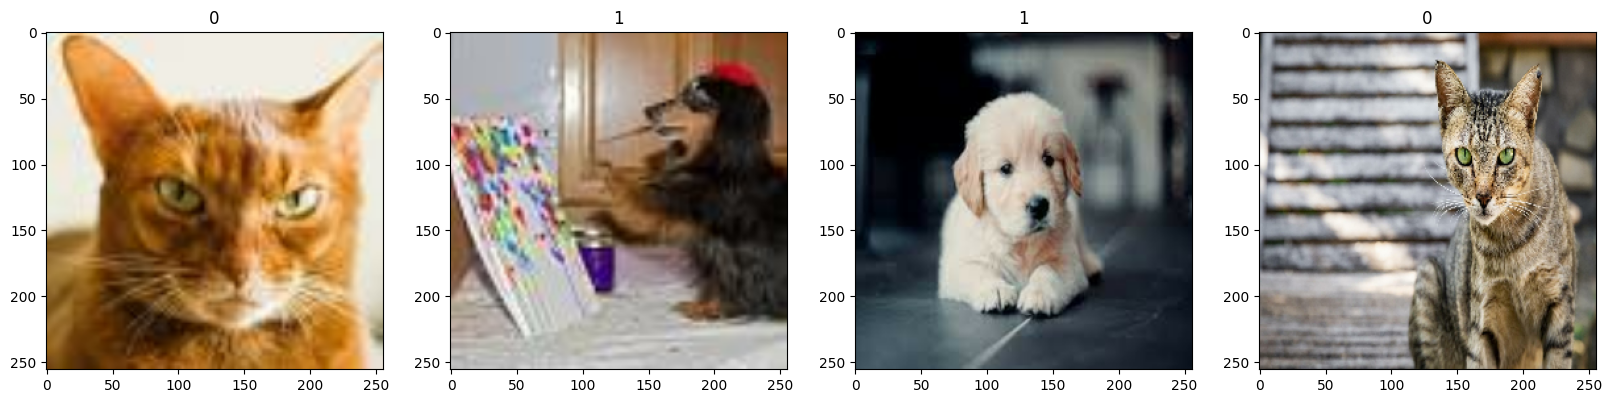

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

### Split Data

In [26]:
len(data)

12

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DL Model

### Build Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [36]:
model = Sequential()

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Train Model

In [56]:
import os
logdir= os.path.join('logs','')

In [57]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 22s 791ms/step - loss: 0.9688 - accuracy: 0.5586 - val_loss: 0.7630 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 11s 1s/step - loss: 0.6972 - accuracy: 0.5312 - val_loss: 0.7226 - val_accuracy: 0.3594
Epoch 3/20
8/8 [==============================] - 13s 1s/step - loss: 0.6916 - accuracy: 0.5508 - val_loss: 0.6814 - val_accuracy: 0.5938
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.6781 - accuracy: 0.5859 - val_loss: 0.6593 - val_accuracy: 0.6094
Epoch 5/20
8/8 [==============================] - 16s 2s/step - loss: 0.6555 - accuracy: 0.6680 - val_loss: 0.6188 - val_accuracy: 0.6094
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.6393 - accuracy: 0.6680 - val_loss: 0.5981 - val_accuracy: 0.6406
Epoch 7/20
8/8 [==============================] - 12s 1s/step - loss: 0.6444 - accuracy: 0.6016 - val_loss: 0.5921 - val_accuracy: 0.6406
Epoch 8/20
8/8 [===============

### Plot Performance

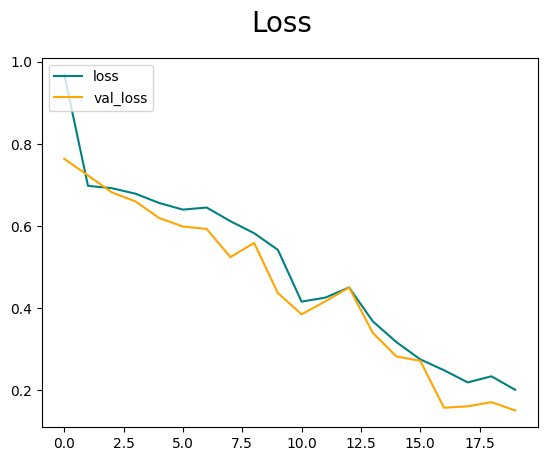

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

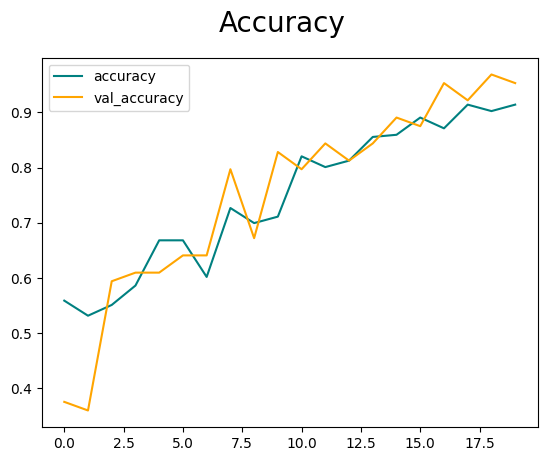

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 459ms/step


In [71]:
print(f'Precision: {pre.result().numpy():.2f}, Recall: {re.result().numpy():.2f}, Accuracy: {acc.result().numpy():.2f}')

Precision: 0.92, Recall: 0.96, Accuracy: 0.94


### Test Outside Dataset

In [88]:
import cv2
import matplotlib.pyplot as plt

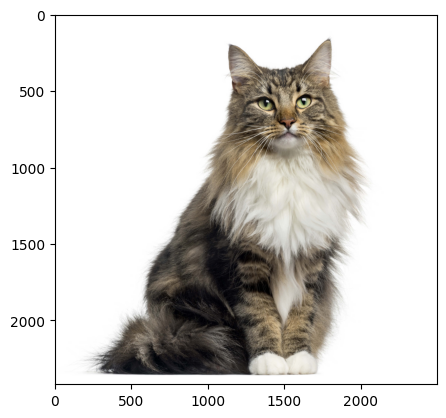

In [135]:
img = plt.imread('/testcat.jpg')
plt.imshow(img)
plt.show()

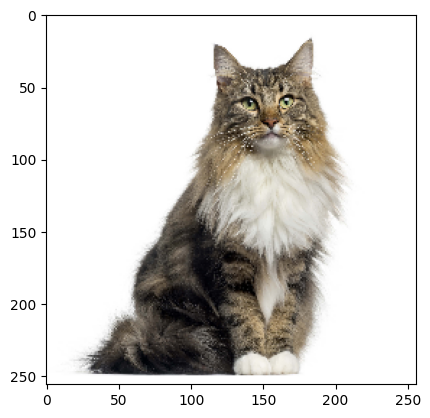

In [136]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [137]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [138]:
yhat

array([[0.00144267]], dtype=float32)

In [139]:
if yhat > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


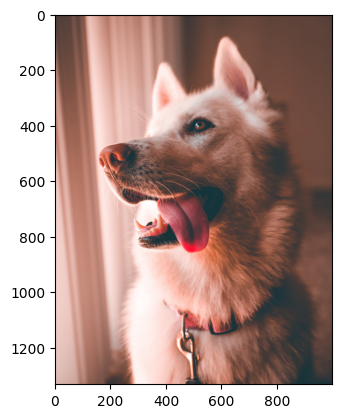

In [140]:
img = plt.imread('/testdog.jpg')
plt.imshow(img)
plt.show()

In [141]:
resize = tf.image.resize(img, (256,256))

In [142]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [143]:
if yhat > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is dog


# Save Model

In [112]:
from tensorflow.keras.models import load_model

In [118]:
model.save(os.path.join('models','imageclassifier.h5'))

In [120]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [122]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [144]:
if yhat > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is dog
